In [1]:
import gym
from final_project.envs.opt_env1 import OptEnv1
import numpy as np
from stable_baselines3 import PPO
import matplotlib.pyplot as plt

n = 2
A = np.random.randn(n,n)
A = A.T@A

f = lambda x: .5*x@(A@x)
grad_f = lambda x: A@x
x0 = 5*np.ones(n)
lr0 = .05

env = gym.make('opt-env-v1', f=f, grad_f=grad_f, x0=x0, lr0=lr0)

In [9]:
env.set_mode('train')
# model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=50000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 18.9     |
|    ep_rew_mean     | -145     |
| time/              |          |
|    fps             | 1971     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 16.1        |
|    ep_rew_mean          | -132        |
| time/                   |             |
|    fps                  | 1384        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016730854 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss   

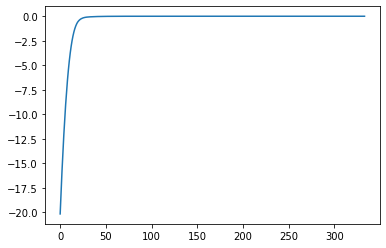

In [14]:
env.set_mode('test')

obs = env.reset()

done = False
rewards = []
obj_vals = []
lrs = []
g_norms = []
actions = []

i = 0
while not done:
    action = model.predict(obs)[0]
    # action = 1 if i%2==0 else 0
    
    obs, reward, done, info = env.step(action)

    rewards += [reward]
    actions += [action]
    g_norms += [obs[3]]
    obj_vals += [obs[4]]
    lrs += [obs[0]]
    i += 1

plt.plot(np.arange(i), np.array(rewards))

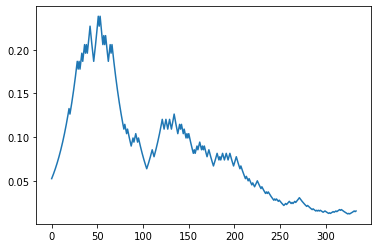

In [15]:
plt.plot(np.arange(i), np.array(lrs))

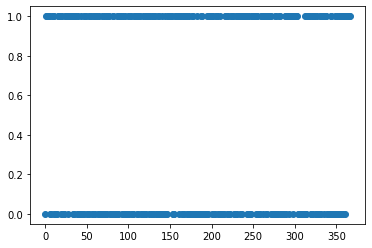

In [5]:
plt.scatter(np.arange(i), np.array(actions))

In [10]:
lrs

[0.047619047619047616,
 0.04535147392290249,
 0.04319187992657379,
 0.04113512373959408,
 0.039176308323422934,
 0.03731076983183136,
 0.035534066506506055,
 0.03731076983183136,
 0.039176308323422934,
 0.04113512373959408,
 0.04319187992657379,
 0.04535147392290249,
 0.04319187992657379,
 0.04535147392290249,
 0.047619047619047616,
 0.04535147392290249,
 0.047619047619047616,
 0.05,
 0.047619047619047616,
 0.04535147392290249,
 0.047619047619047616,
 0.05,
 0.052500000000000005,
 0.05,
 0.047619047619047616,
 0.05,
 0.052500000000000005,
 0.05,
 0.052500000000000005,
 0.05512500000000001,
 0.052500000000000005,
 0.05512500000000001,
 0.052500000000000005,
 0.05512500000000001,
 0.052500000000000005,
 0.05512500000000001,
 0.052500000000000005,
 0.05512500000000001,
 0.052500000000000005,
 0.05,
 0.047619047619047616,
 0.04535147392290249,
 0.047619047619047616,
 0.05,
 0.052500000000000005,
 0.05512500000000001,
 0.052500000000000005,
 0.05,
 0.047619047619047616,
 0.05,
 0.0525000000